C:\Users\Silly Emilien\AppData\Local\Temp\ipykernel_19908\1632314881.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('RdYlGn_r')


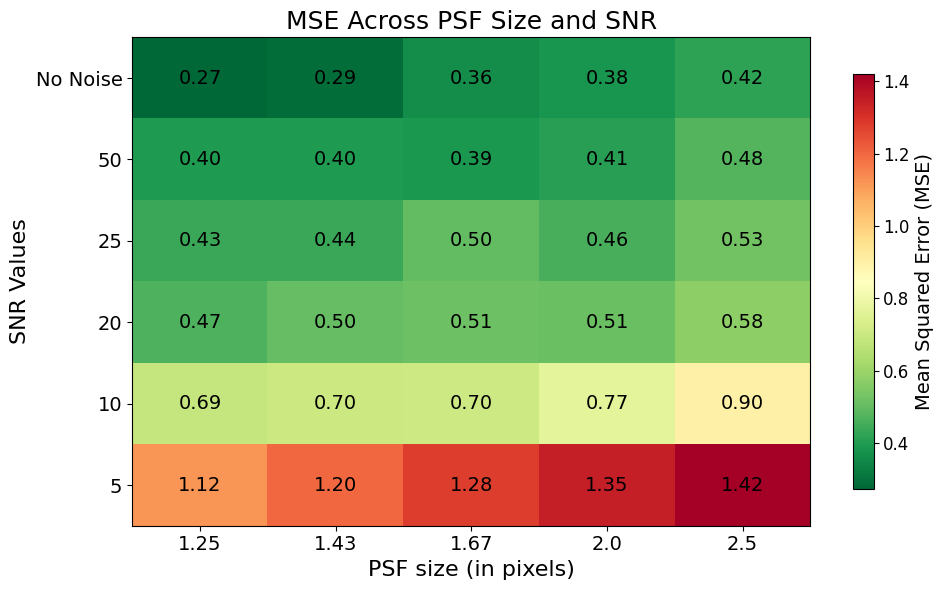

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


def plot_from_csv(csv_file, noise_values, psf_values):
    df = pd.read_csv(csv_file)

    
    N_Noise = len(noise_values)
    N_PSF = len(psf_values)

    mse_grid = np.full((N_Noise, N_PSF), np.nan)
    for _, row in df.iterrows():
        i = noise_values.index(row["noise"])
        j = psf_values.index(row["psf"])
        mse_grid[i, j] = row["mse"]

    cmap = plt.cm.get_cmap('RdYlGn_r')
    norm = mcolors.Normalize(vmin=np.nanmin(mse_grid), vmax=np.nanmax(mse_grid))

    plt.figure(figsize=(10, 6))
    im = plt.imshow(mse_grid, cmap=cmap, norm=norm, aspect='auto')

    for i in range(N_Noise):
        for j in range(N_PSF):
            val = mse_grid[i, j]
            if not np.isnan(val):
                plt.text(j, i, f"{val:.2f}", ha='center', va='center', color='black', fontsize=14)

    cbar = plt.colorbar(im, shrink=0.85)
    cbar.set_label("Mean Squared Error (MSE)", fontsize=14)
    cbar.ax.tick_params(labelsize=12)

    plt.xticks(np.arange(N_PSF), psf_values, fontsize=14)
    plt.yticks(np.arange(N_Noise), noise_values, fontsize=14)
    plt.xlabel("PSF size (in pixels)", fontsize=16)
    plt.ylabel("SNR Values", fontsize=16)
    plt.title("MSE Across PSF Size and SNR", fontsize=18)

    plt.tight_layout()
    plt.show()


noise_values = ['No Noise', '50', '25', '20', '10', '5']
psf_values = [1.25, 1.43, 1.67, 2.0, 2.5]

csv_path = "PSFNoiseResults.csv"

plot_from_csv(csv_path, noise_values,psf_values)



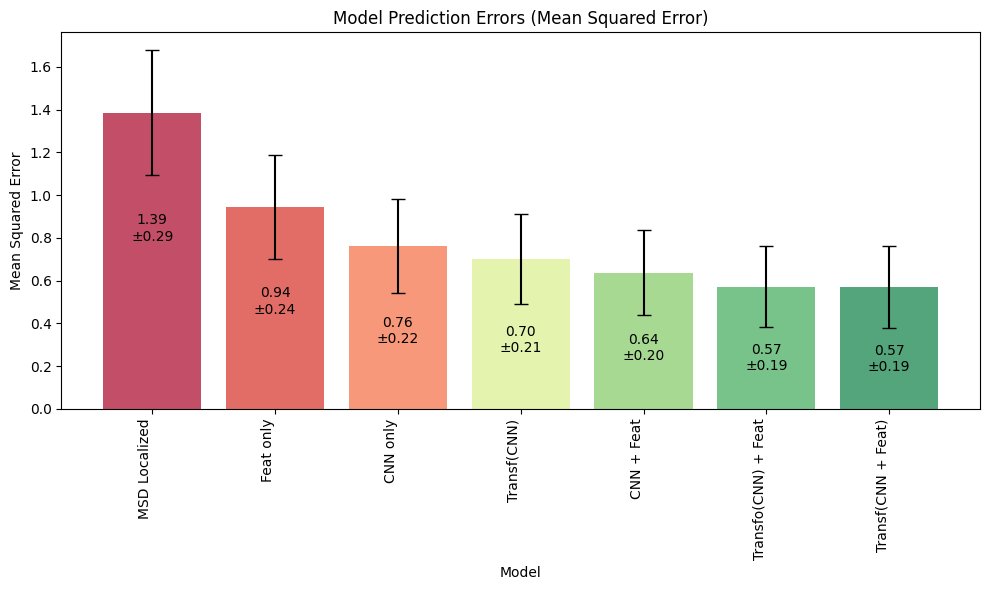

In [ ]:
def plot_model_errors_from_csv(csv_file, colors_dict, selected_models=None):
    df = pd.read_csv(csv_file)

    if selected_models is not None:
        # Filter and reorder rows based on selected_models
        df = df.set_index("model").loc[selected_models].reset_index()
    else:
        selected_models = df["model"].tolist()

    model_names = df["model"].tolist()
    mean_errors = df["mse"].astype(float).tolist()
    std_errors = df["std"].astype(float).tolist()
    colors = [colors_dict.get(name, "#000000") for name in model_names]

    plt.figure(figsize=(10, 6))
    bars = plt.bar(model_names, mean_errors, yerr=std_errors,
                   capsize=5, alpha=0.7, color=colors)

    plt.title('Model Prediction Errors (Mean Squared Error)')
    plt.xlabel('Model')
    plt.ylabel('Mean Squared Error')
    plt.xticks(rotation=90, ha='right')
    plt.tight_layout()

    for i, (mean, std) in enumerate(zip(mean_errors, std_errors)):
        if not np.isnan(std):
            y = mean - 2*std - 0.02 * max(mean_errors)
            plt.text(i, y, f'{mean:.2f}\n±{std:.2f}', ha='center', va='bottom')

    plt.show()

colors_dict = {'MSD_Perfect': (0.007996924259900048, 0.42260668973471743, 0.22337562475970782, 1.0), 'CNN + Feat Aug': (0.4, 0.7411764705882353, 0.38823529411764707, 1.0), 'Transf(CNN + Feat) Aug': (0.007996924259900048, 0.42260668973471743, 0.22337562475970782, 1.0), 'MSD Localized': (0.6624375240292195, 0.014763552479815456, 0.1493271818531334, 1.0), 'MSD Frame': (0.8008458285274894, 0.14763552479815456, 0.1520953479430988, 1.0), 'Feat only': (0.8392925797770088, 0.18454440599769317, 0.1528642829680892, 1.0), 'CNN only': (0.9568627450980393, 0.42745098039215684, 0.2627450980392157, 1.0), 'CNN only Aug': (0.9914648212226067, 0.677354863514033, 0.37808535178777386, 1.0), 'Transf(CNN)': (0.8509803921568628, 0.9372549019607844, 0.5450980392156864, 1.0), 'Transf(CNN) Aug': (0.7098039215686277, 0.8763552479815456, 0.45374855824682825, 1.0), 'CNN + Feat': (0.5181084198385237, 0.7928489042675895, 0.4011534025374856, 1.0), 'Transfo(CNN) + Feat': (0.24805843906189928, 0.66720492118416, 0.3502499038831219, 1.0), 'Transf(CNN + Feat)': (0.04798154555940023, 0.4964244521337947, 0.2618223760092272, 1.0), 'MSD Perfect': (0.007996924259900048, 0.42260668973471743, 0.22337562475970782, 1.0), '': (0.007996924259900048, 0.42260668973471743, 0.22337562475970782, 1.0)}

# pour afficher tous les modèles prendre cette liste
# Le smodèles avec 'Aug' sont ceux qui ont preédit sur les rotations des images
all_models = [ 'MSD Localized', 'MSD Frame', 'Feat only', 'CNN only', 'CNN only Aug', 'Transf(CNN)', 'Transf(CNN) Aug', 'CNN + Feat', 'CNN + Feat Aug', 'Transf(CNN + Feat) Aug','Transfo(CNN) + Feat', 'Transf(CNN + Feat)', 'MSD Perfect']
# pour afficher que les modèles qui sont sur le rapport prendre cette liste
results_poster_models = [ 'MSD Localized','Feat only', 'CNN only', 'Transf(CNN)',  'CNN + Feat', 'Transfo(CNN) + Feat', 'Transf(CNN + Feat)']


path = "model_errors.csv"
plot_model_errors_from_csv(path,colors_dict, results_poster_models)

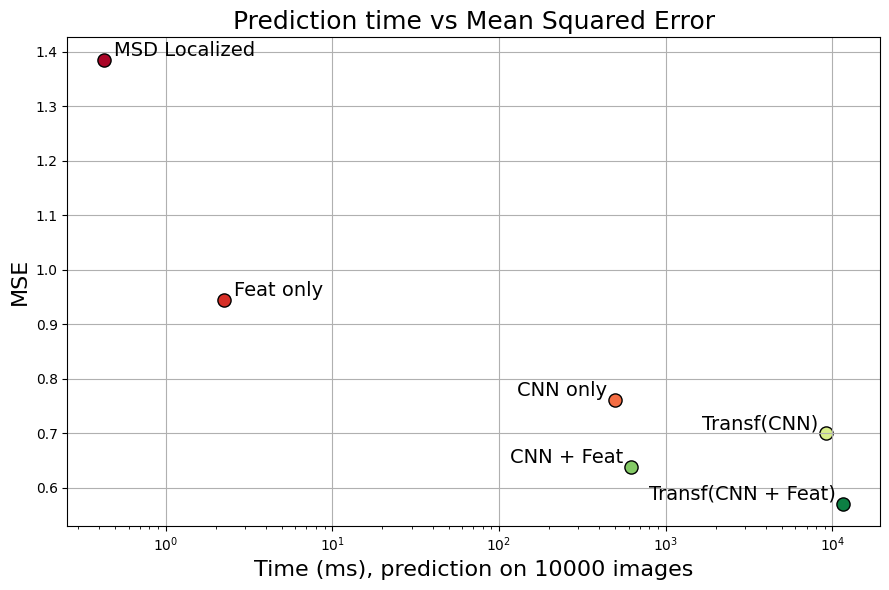

In [ ]:
time_dict = {
    "MSD Localized": (0.429,0.014),
    "Feat only": (2.24,0.2),

    "Transf(CNN)": (9200,415),
    "Transf(CNN + Feat)": (11600,135),
    "CNN only": (496,22),
    "CNN + Feat": (622,27),
}
colors_dict = {'MSD_Perfect': (0.007996924259900048, 0.42260668973471743, 0.22337562475970782, 1.0), 'CNN + Feat Aug': (0.4, 0.7411764705882353, 0.38823529411764707, 1.0), 'Transf(CNN + Feat) Aug': (0.007996924259900048, 0.42260668973471743, 0.22337562475970782, 1.0), 'MSD Localized': (0.6624375240292195, 0.014763552479815456, 0.1493271818531334, 1.0), 'MSD Frame': (0.8008458285274894, 0.14763552479815456, 0.1520953479430988, 1.0), 'Feat only': (0.8392925797770088, 0.18454440599769317, 0.1528642829680892, 1.0), 'CNN only': (0.9568627450980393, 0.42745098039215684, 0.2627450980392157, 1.0), 'CNN only Aug': (0.9914648212226067, 0.677354863514033, 0.37808535178777386, 1.0), 'Transf(CNN)': (0.8509803921568628, 0.9372549019607844, 0.5450980392156864, 1.0), 'Transf(CNN) Aug': (0.7098039215686277, 0.8763552479815456, 0.45374855824682825, 1.0), 'CNN + Feat': (0.5181084198385237, 0.7928489042675895, 0.4011534025374856, 1.0), 'Transfo(CNN) + Feat': (0.24805843906189928, 0.66720492118416, 0.3502499038831219, 1.0), 'Transf(CNN + Feat)': (0.04798154555940023, 0.4964244521337947, 0.2618223760092272, 1.0), 'MSD Perfect': (0.007996924259900048, 0.42260668973471743, 0.22337562475970782, 1.0), '': (0.007996924259900048, 0.42260668973471743, 0.22337562475970782, 1.0)}

import pandas as pd

# Load MSE data from CSV
path = "model_errors.csv"
df = pd.read_csv(path)

# Create mse_dict with model names as keys and MSE values as values
mse_dict = dict(zip(df["model"], df["mse"].astype(float)))


def plot_time_vs_error(selected_models, color_dict, mse_dict, time_dict):
    x = []
    y = []
    colors = []
    labels = []

    for model in selected_models:
        if model not in mse_dict or model not in time_dict:
            raise ValueError(f"Missing data for model '{model}' in mse_dict or time_dict.")
        if model not in color_dict:
            raise ValueError(f"Missing color for model '{model}' in color_dict.")
        
        x.append(time_dict[model][0])
        y.append(mse_dict[model])
        colors.append(color_dict[model])
        labels.append(model)

    plt.figure(figsize=(9, 6))
    for i in range(len(x)):
        plt.scatter(x[i], y[i], s=90, color=colors[i], edgecolors='black', label=labels[i], marker='o')
        
        # Manual positioning for each label to avoid overlap with points
        offset_x = x[i] * 1.15 if i < 2 else x[i] * 0.9  # Horizontal offset
        offset_y = y[i] 
        
        plt.text(offset_x, offset_y, labels[i], fontsize=14, 
                ha='left' if i < 2 else 'right', 
                va='bottom' )

    plt.xlabel("Time (ms), prediction on 10000 images", fontsize=16)
    plt.ylabel("MSE", fontsize=16)
    plt.xscale('log')
    plt.title("Prediction time vs Mean Squared Error", fontsize=18)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#plot_time_vs_error(sel_models, colors_dict, mse_dict, time_dict)
plot_time_vs_error(time_dict.keys(), colors_dict, mse_dict, time_dict)